<a href="https://colab.research.google.com/github/pranscript/ml_coursework/blob/master/Homework_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=400, height=200)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline
from scipy import spatial
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()
X = iris.data
Y = iris.target

In [5]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [0]:
import math

In [0]:

class K_Means:
  def __init__(self, k, tolerance = 0.0001, max_iterations = 500,):
    self.k = k
    self.tolerance = tolerance
    self.max_iterations = max_iterations

  def fit(self, data,flag):
    self.centroids = {}
    self.flag= flag
  
    for i in range(self.k):
      self.centroids[i] = data[i]

    for i in range(self.max_iterations):
      self.classes = {}
      for i in range(self.k):
        self.classes[i] = []
      for features in data:
        distances = []
        if self.flag==0:
          distances = [spatial.distance.cosine(features,self.centroids[centroid]) for centroid in self.centroids]
        elif self.flag==1:
          distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
        elif self.flag==2:
          for centroid in self.centroids:
            size_s1 = len(features)
            size_s2 = len(self.centroids)
            intersect = np.intersect1d(features,self.centroids[centroid])
            size_in = len(intersect)
            jaccard_in = size_in  / (size_s1 + size_s2 - size_in)
            distances.append(1 - jaccard_in)
            distances = [spatial.distance.cosine(features,self.centroids[centroid]) for centroid in self.centroids]
        
        classification = distances.index(min(distances))
        self.classes[classification].append(features)
  
      previous = dict(self.centroids)
        
      for classification in self.classes:
        self.centroids[classification] = np.nanmean(self.classes[classification], axis=0)

      isOptimal = True

      for centroid in self.centroids:
        original_centroid = previous[centroid]
        curr = self.centroids[centroid]
        
        if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
          isOptimal = False
          
      if isOptimal:
        break

{0: array([5.08235294, 3.72941176, 1.38823529, 0.24705882]), 1: array([6.262, 2.872, 4.906, 1.676]), 2: array([4.96666667, 3.27272727, 1.5       , 0.24545455])}


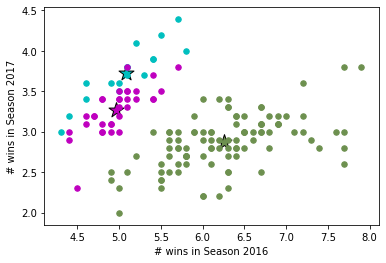

{0: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), 1: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 2: array([5.006, 3.428, 1.462, 0.246])}


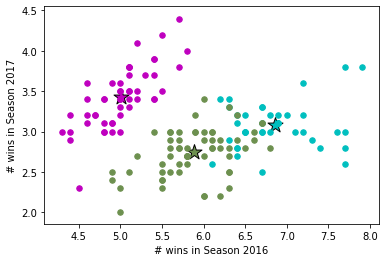

{0: array([5.08235294, 3.72941176, 1.38823529, 0.24705882]), 1: array([6.262, 2.872, 4.906, 1.676]), 2: array([4.96666667, 3.27272727, 1.5       , 0.24545455])}


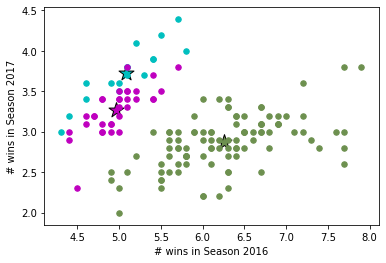

In [122]:
def main():
  km = K_Means(3)
  for i in range(0,3):
    if i==0:
      km.fit(X,i)
    elif i==1:
      km.fit(X,i)
    elif i==2:
      km.fit(X,i)
    plt.figure()
    plt.xlabel("# wins in Season 2016")
    plt.ylabel("# wins in Season 2017")
    colors = 10*["c", "#6d904f","m"]
    print(km.centroids)
    for centroid in km.centroids:
      color = colors[centroid]
      plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1],s = 250,marker = "*",color=color,edgecolor='black')
    
    for classification in km.classes:
      color = colors[classification]
      for features in km.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)
    plt.show()
if __name__ == "__main__":
	main()